In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Concrete')

In [37]:
os.getcwd()

'/content/drive/My Drive/Concrete'

In [0]:
# Standard imports
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
from pylab import rcParams
import seaborn as sns; sns.set(style="ticks", color_codes=True)
rcParams['figure.figsize'] = 15, 10

warnings.simplefilter('ignore')

In [0]:
df = pd.read_csv('concrete.csv')

In [40]:
df.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [41]:
df.describe()

,cement,slag,ash,water,splast,coarse,fine,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cement    1030 non-null   float64
 1   slag      1030 non-null   float64
 2   ash       1030 non-null   float64
 3   water     1030 non-null   float64
 4   splast    1030 non-null   float64
 5   coarse    1030 non-null   float64
 6   fine      1030 non-null   float64
 7   age       1030 non-null   int64  
 8   strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [0]:
features = ["cement","slag","ash","water","splast","coarse","fine","age"]
target = ["strength"]

X = df[features]
y = df[target]

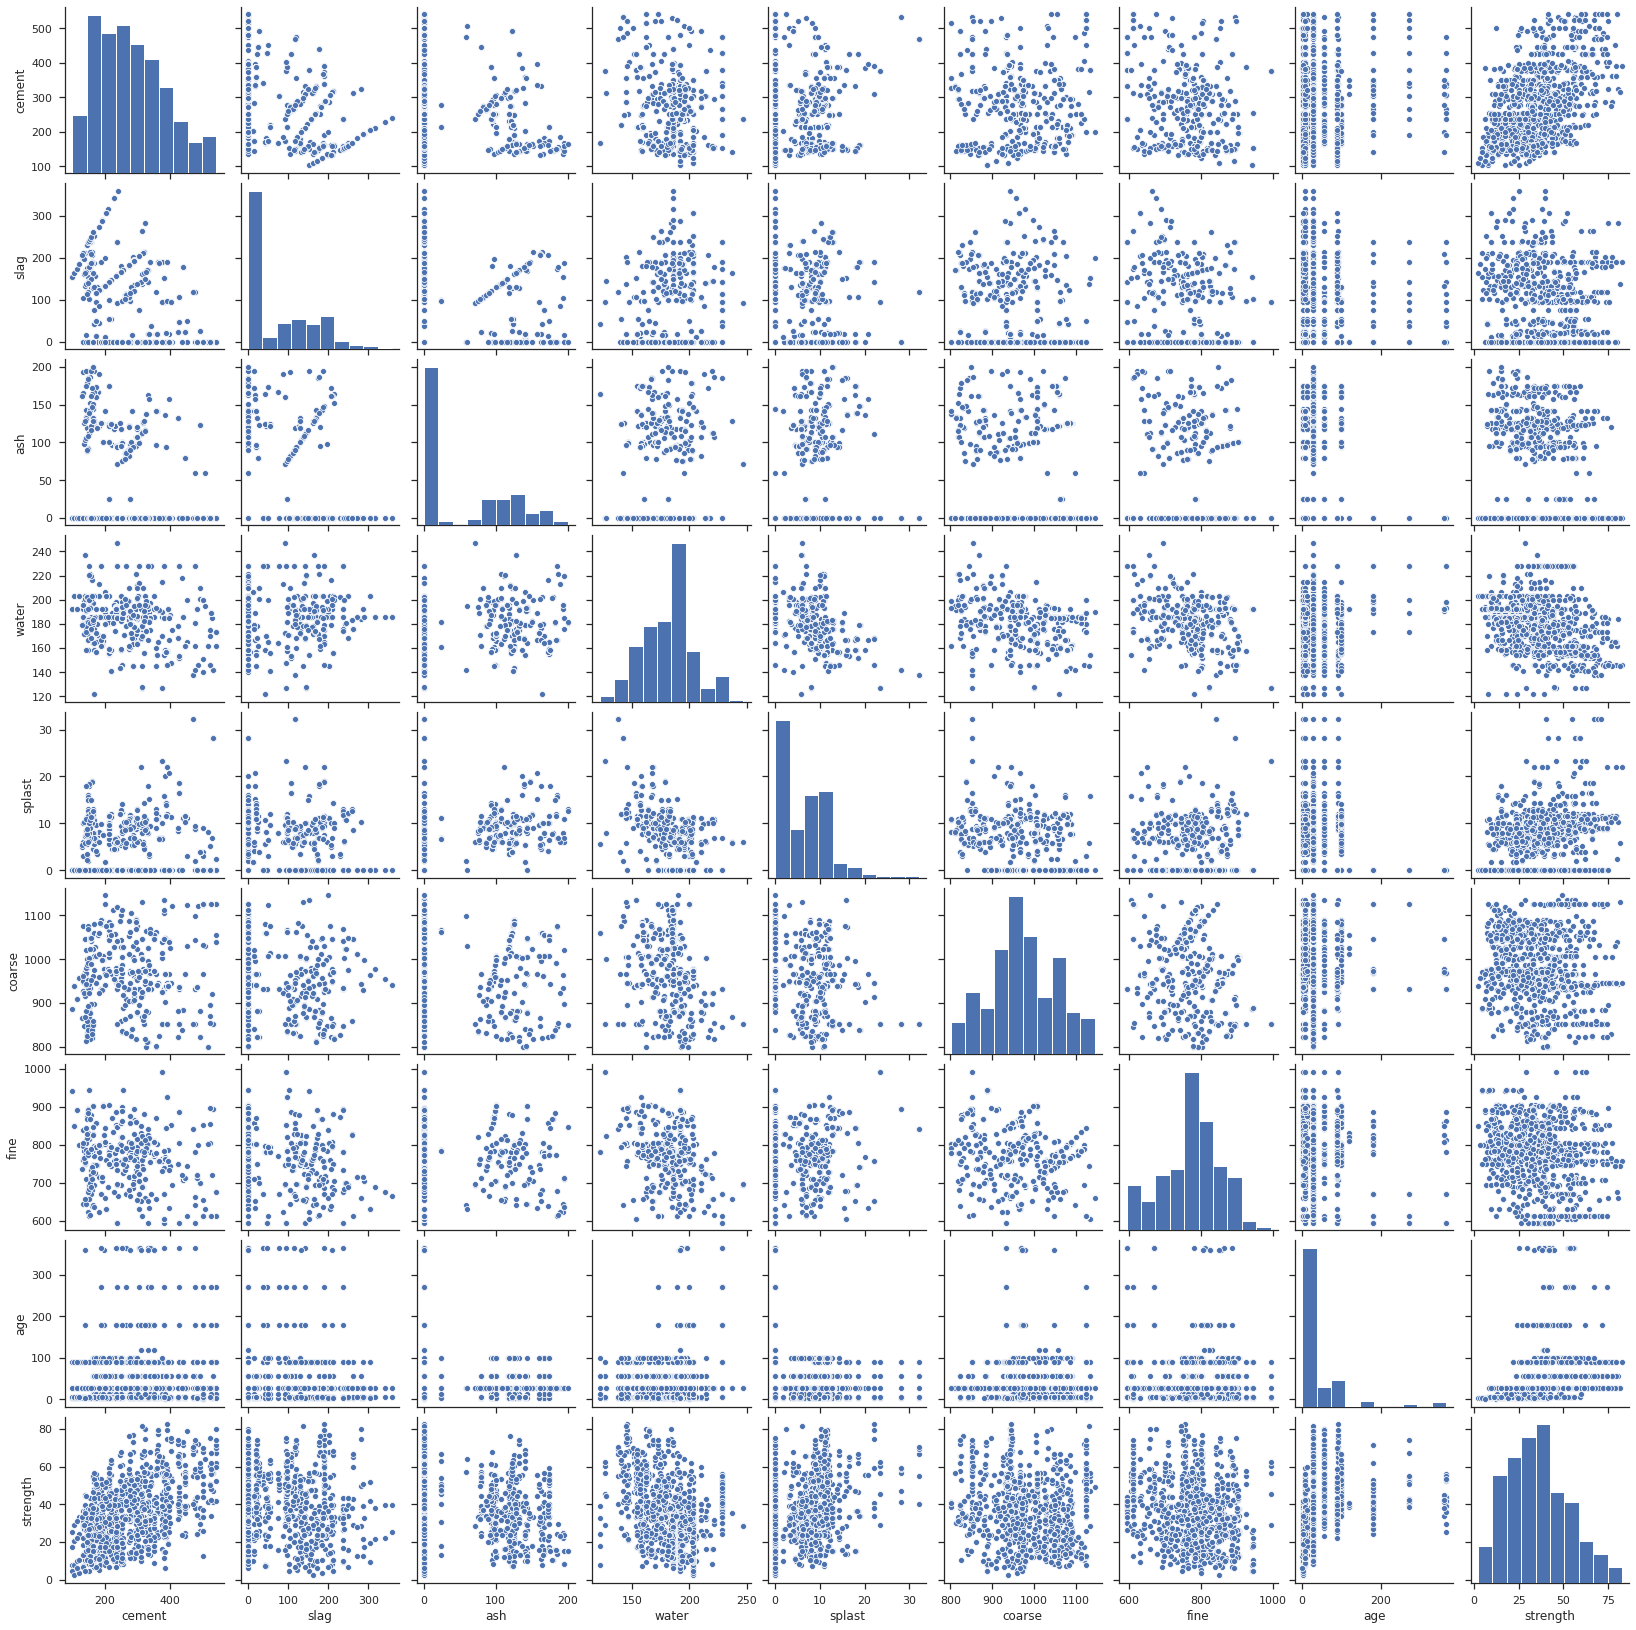

In [44]:
#To get a view of the overall distribution, check a pairwise plot

sns.pairplot(df)

In [0]:
from yellowbrick.features.importances import FeatureImportances
from sklearn.linear_model import Lasso

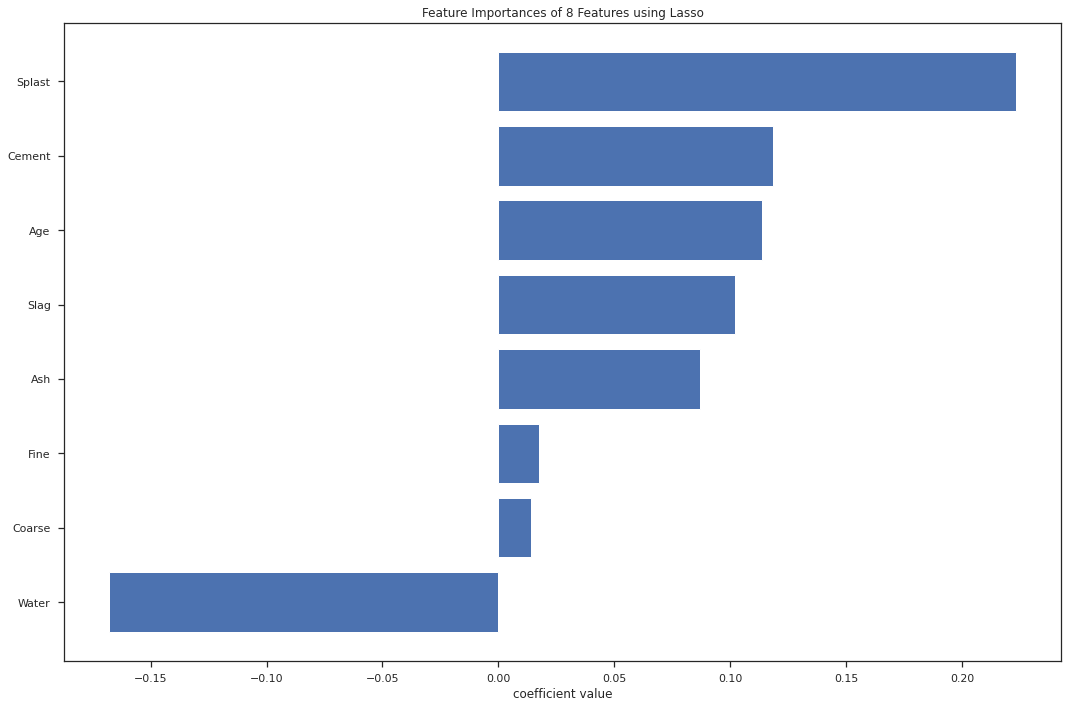

In [46]:
fig = plt.figure()
ax = fig.add_subplot()

labels = list(map(lambda s : s.title(), features))
viz = FeatureImportances(Lasso(), ax = ax, labels = labels, relative = False)

viz.fit(X, y)
viz.poof()

In [0]:
y = np.array(y)[:, 0]

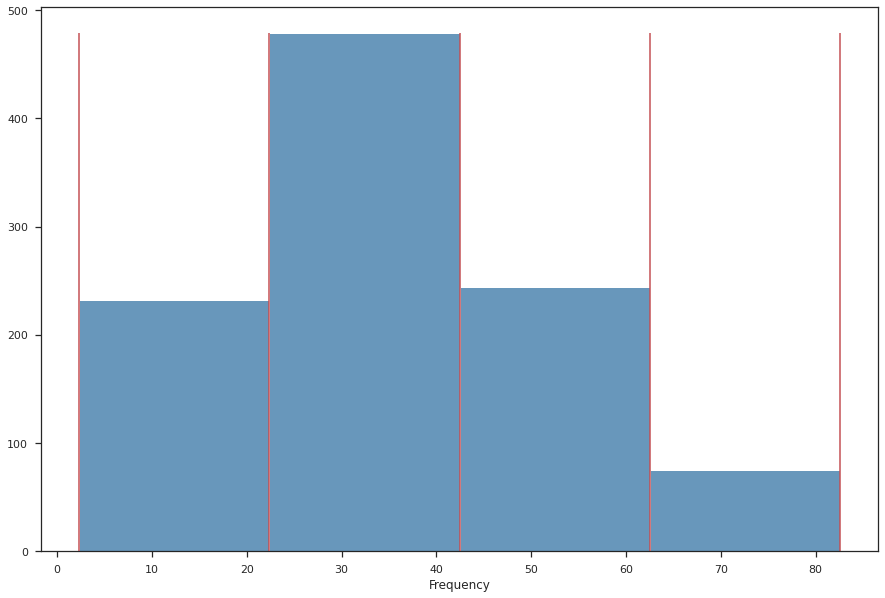

In [54]:
from yellowbrick.target import BalancedBinningReference

# Instantiate the visualizer
visualizer = BalancedBinningReference()

visualizer.fit(y)          # Fit the data to the visualizer
visualizer.poof()          # Draw/show/poof the data

#This is only on the target data
#Used when we face the curse of dimensionality
#Here the number of feature values we have are not good enough to predict a regression outcome
#in that case we divide the continuous y values into sections shown by the bins and work with that
#This is not used here as we have enough data points

#NOTE - Convert y into a 1D array or series

In [0]:
#Lasso Regression
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


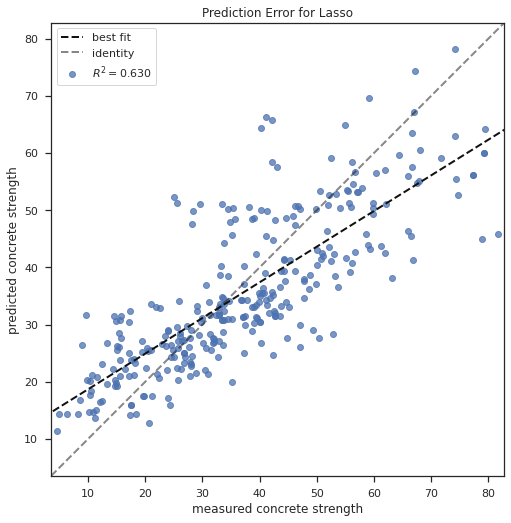

In [56]:
#There are 2 methods we are using here to evaluate our regression model
#1. Using the prediction error, comparing with best fit line and the 45deg line
#2. Using residualsplot, where a uniform normal distribution of residuals about the y = 0 line is a confirmation of a good model
#The bar graph also will show the uniform normal distribution


visualizer = PredictionError(Lasso(), size=(800, 600))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Call finalize to draw the final yellowbrick-specific elements
visualizer.finalize()

# labels for the axes objects
visualizer.ax.set_xlabel("measured concrete strength")
visualizer.ax.set_ylabel("predicted concrete strength");

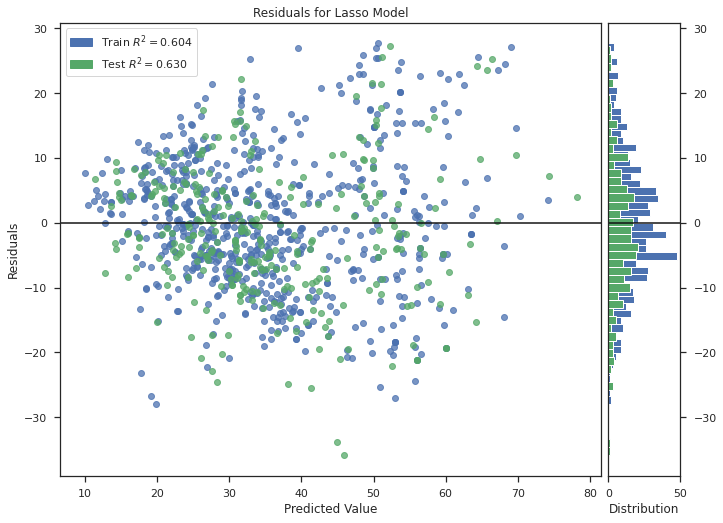

In [57]:
#Check the test set errors

from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(Lasso(), size=(800,600))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

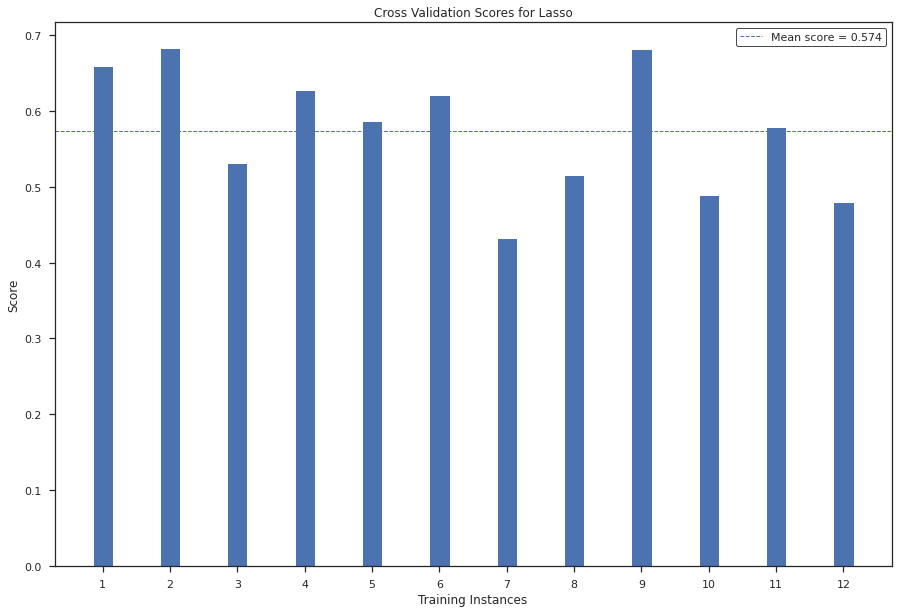

In [58]:
#Check the cross validation results

from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

# Create a new figure and axes
_, ax = plt.subplots()

cv = KFold(12)

visualizer = CVScores(
    Lasso(), ax=ax, cv=cv, scoring='r2'
)

visualizer.fit(X_train, y_train)
visualizer.poof()

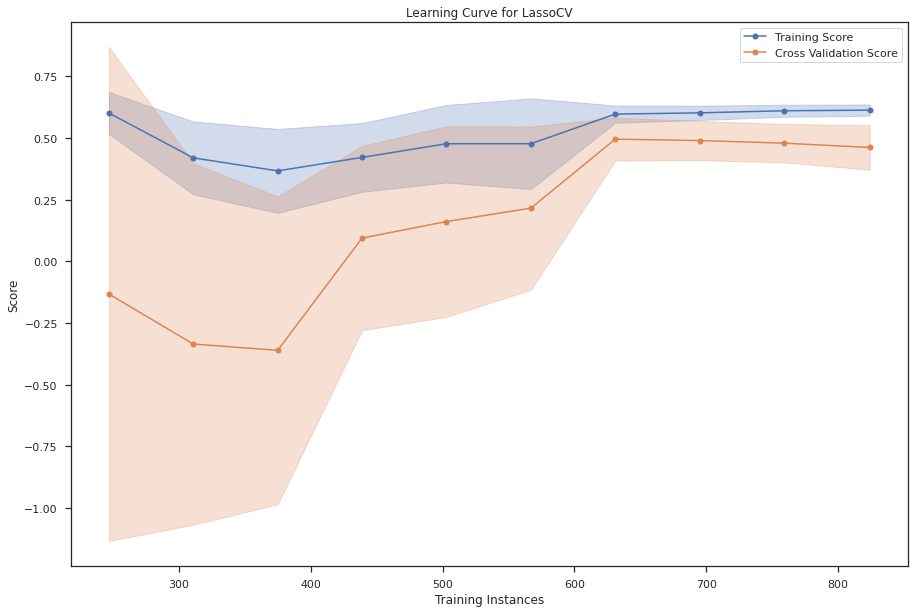

In [61]:
#Fit a learning curve
#This is used to study how much data would boost the model performance
#This is also used to check the error due to bias and variance and how to fix it
#Look for the point where both the val and train score are converging

from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import LassoCV
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Create the learning curve visualizer
sizes = np.linspace(0.3, 1.0, 10)

# Create the learning curve visualizer, fit and poof
viz = LearningCurve(LassoCV(), train_sizes=sizes, scoring='r2')
viz.fit(X, y)
viz.poof()

The `AlphaSelection` Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models.

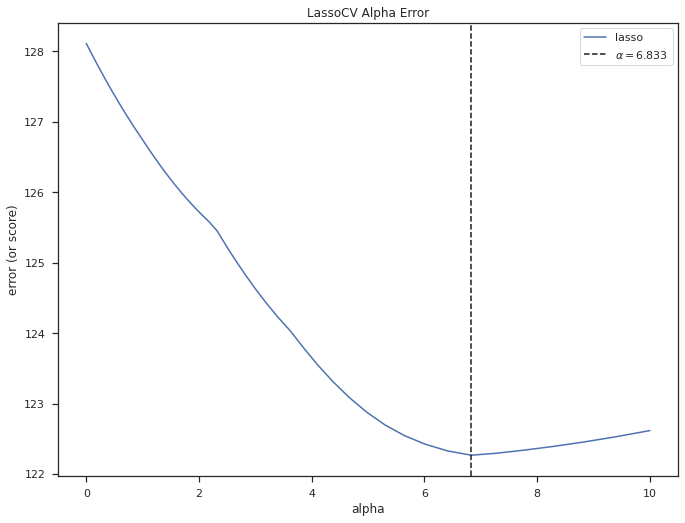

In [60]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model, size=(800,600))

visualizer.fit(X, y)
g = visualizer.poof()